# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision


## Homework 3 - Segmentation and Homographies
---

### <a style='color:red'> Due Date: 08.01.2025 </a>

### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
#### READ THIS CAREFULLY
* Submission only in **pairs**.
* **No handwritten submissions**.
* You can choose your working environment:
    * You can work in a `Jupyter Notebook`, locally with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or online on <a href="https://colab.research.google.com/">Google Colab</a>
  * **Important**: Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime` $\rightarrow$  `Change Runtime Type` $\rightarrow$`GPU`.
    * You can work in a Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both also allow opening/editing Jupyter Notebooks.

* Make sure you submit your exercise according to the requirements in the <a href="https://moodle.technion.ac.il/pluginfile.php/1823033/mod_resource/content/2/Homework%20guidelines.pdf">"Homework submission guidelines"</a> file that appears in the course website (Moodle). 
* **The code should run both on CPU and GPU without manual modifications**, require no special preparation and run on every computer.
* Be precise, we expect on point answers.
* Submission on the course website (Moodle).
* Bonuses are up to 10 points total (together). Maximum grade for submission is 105.

### <img src="https://img.icons8.com/dusk/64/000000/python.png" style="height:50px;display:inline"> Python Libraries
---

* `numpy`
* `matplotlib`
* `pytorch` (and `torchvision`)
* `opencv` (or `scikit-image`)
* `scikit-learn`
* Anything else you need (`PIL`, `os`, `pandas`, `csv`, `json`,...)

### Quick note
in this task, you will be required to use Deep learning segmentation methods. for that, you can use any method that has been presented in class, including but not limited to SegmentAnything,Mask-RCNN, and more.
if you choose SegmentAnything, use the following link to see an example for usage: <a href="https://github.com/facebookresearch/segment-anything">link here</a>. Note: if you use SAM, you must in order to use it, download pre-trained weights. please note in the report which model-type you chose, the link to the download. DO NOT include the pre-traiend weights

#### Installing segment-anything package:

In [3]:
! pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to c:\users\bmessica\appdata\local\temp\pip-req-build-jv77ap7x
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git 'C:\Users\bmessica\AppData\Local\Temp\pip-req-build-jv77ap7x'


### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Tasks
---
* In all tasks, you should document your process and results in a report file (which will be saved as `.pdf`). 
* You can reference your code in the report file, but no need for actual code in this file, the code is submitted in a seprate folder as explained above.

#### Part 1 - Classic Vs. Deep Learning-based Semantic Segmentation - bonus
---
In this part you are going to compare classic methods for segmentation to deep learning-based methods.

1. Load the images in the `./data/frogs` and `./data/horses` folders and display them.
2. Pick 1 classic method for segmentation and 1 deep learning-based method and segment the given images. Display the results.
    * **Briefly** summarize each method you picked and discuss the advantages and disadvantages of each method. In your answer, relate to the results you received in this section.
    * You can use a ready implementation from the internet or OpenCV, no need to implement it yourselves.
    * Note: the classic method **must not** use any neural network.
3. Pick 3 images (download from the internet or take them yourself) that satisfy the following, and dispaly them:
    * One image of a living being (human, animal,...).
    * One image of commonly-used object (car, chair, smartphone, glasses,...).
    * One image of not-so-commonly-used object (fire extinguisher, satellite,... **BE CREATIVE**).
4. Apply each method (one classic and one deep learning-based) on the 3 images. Display the results (mask and segmented image).
    * Which method performed better on each image? Describe your thoughts on why one method is better than the other.
    * For the classic method you can change parameters per-image, document them in the report.
    * You can add manual post-processing to get a mask if needed. If you do that, document in your report "how hard" you had to work in the post-processing stage, as it's an indication of the quality of the method.
5. As you probably have noticed, segmentation can be rough around the edges, i.e., the mask is not perfect and may be noisy around the edges. What can be done to fix or at least alleviate this problem? Your suggestions can be in pre-processing, inside the segmentation algorithm or in post-processing.

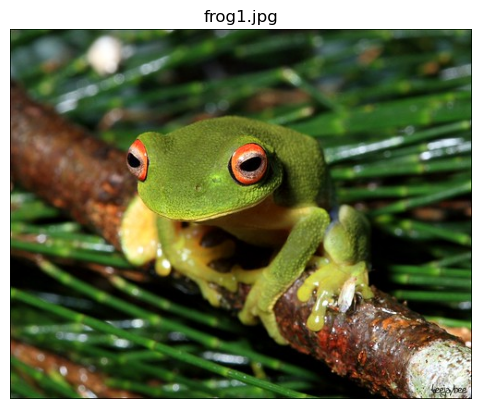

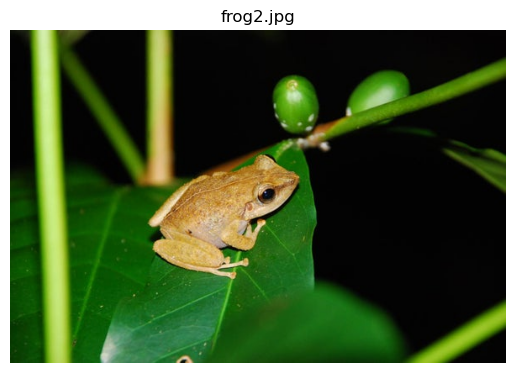

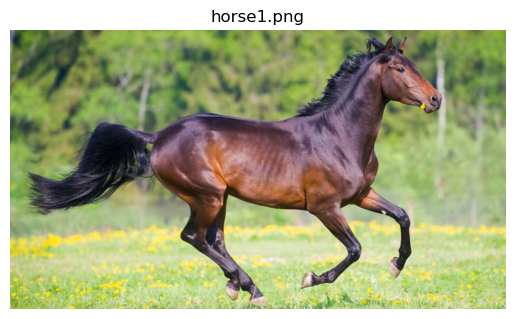

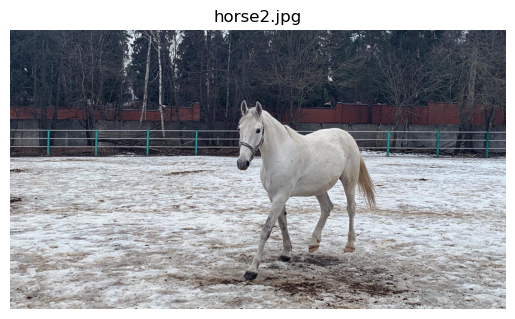

In [49]:
# Function to load and display images from a given directory
import os
from matplotlib import pyplot as plt
from matplotlib.image import imread
import cv2


def load_and_display_images(image_dir):
    """
    Load and display images from a specified directory.

    Parameters:
    - image_dir (str): Path to the directory containing images.

    Returns:
    None
    """
    # Get a list of all image files in the directory
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Loop through each image file, load it, and display it
    for img_file in image_files:
        img_path = os.path.join(image_dir, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert the image to RGB


        # Display the image
        plt.figure()
        plt.imshow(img)
        plt.title(img_file)
        plt.axis('off')  # Turn off axis

# Usage of the function
image_dir = "./data/frogs"
load_and_display_images(image_dir)
image_dir = "./data/horses"
load_and_display_images(image_dir)



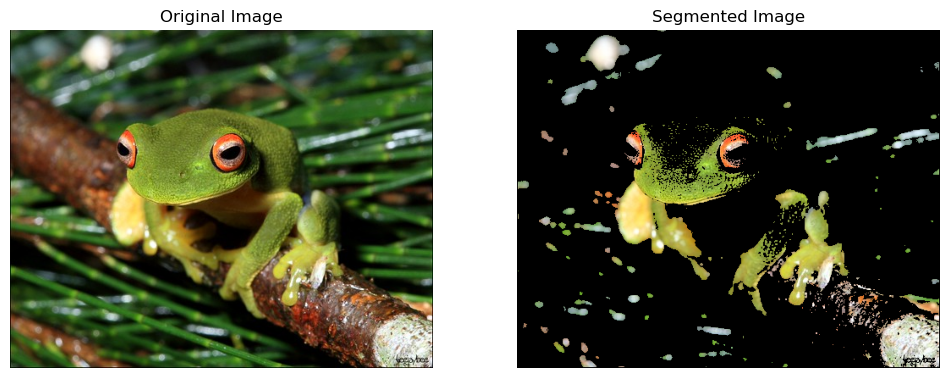

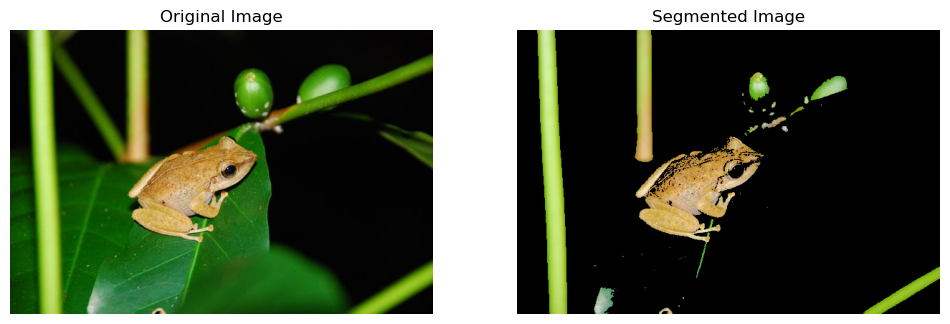

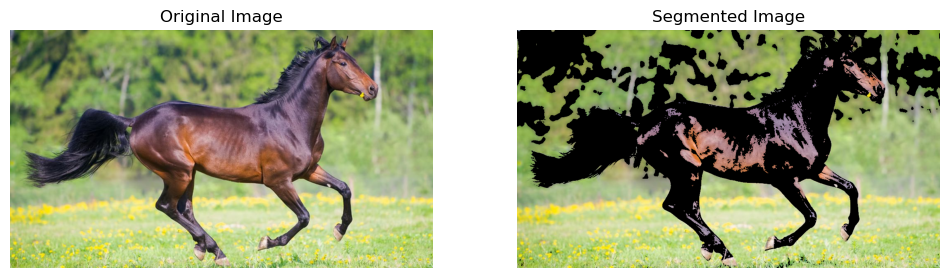

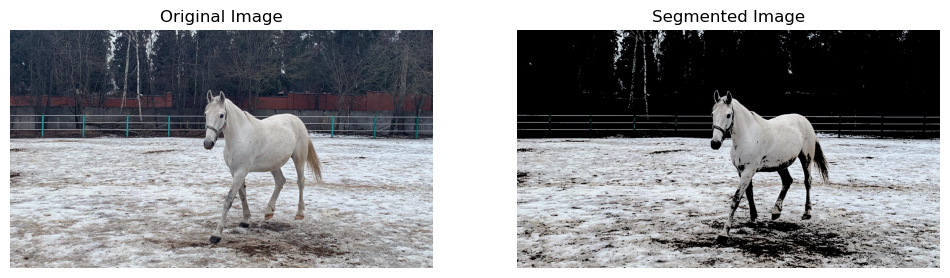

In [37]:
# PART 2a - Segmenting an image using OpenCV and displaying the segmentation

import cv2
import numpy as np

def segment_and_display(image_path):
    """
    Perform a simple segmentation on an image using OpenCV and display the original and segmented images side by side.

    Parameters:
    - image_path (str): Path to the image to be segmented.

    Returns:
    None
    """
    # Load the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert the image to RGB

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding for segmentation
    _, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Create the mask by combining the threshold result back with the original image
    segmented_img = cv2.bitwise_and(img_rgb, img_rgb, mask=thresholded)

    # Display the original and segmented images side by side
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_img)
    plt.title('Segmented Image')
    plt.axis('off')

    plt.show()

# Specify an image path
image_path = './data/frogs/frog1.jpg'
segment_and_display(image_path)
image_path = './data/frogs/frog2.jpg'
segment_and_display(image_path)
image_path = './data/horses/horse1.png'
segment_and_display(image_path)
image_path = './data/horses/horse2.jpg'
segment_and_display(image_path)

Loading SAM model 'vit_b' on cuda.
Segmenting image: ./data/frogs/frog1.jpg with offset (0, 0)...


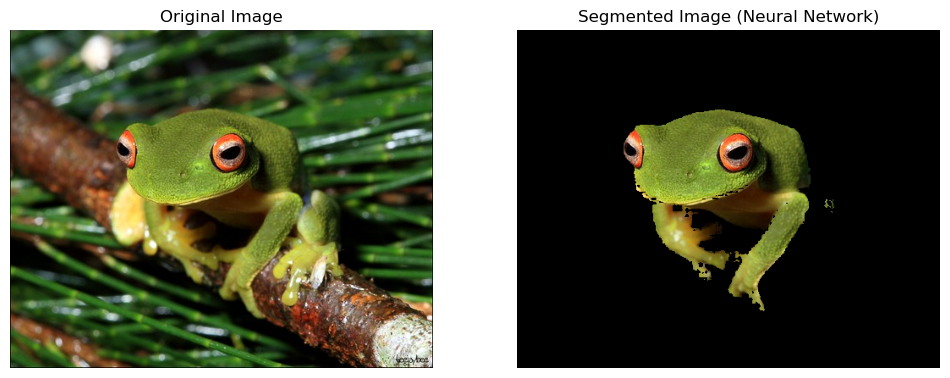

Segmenting image: ./data/frogs/frog2.jpg with offset (-20, 50)...


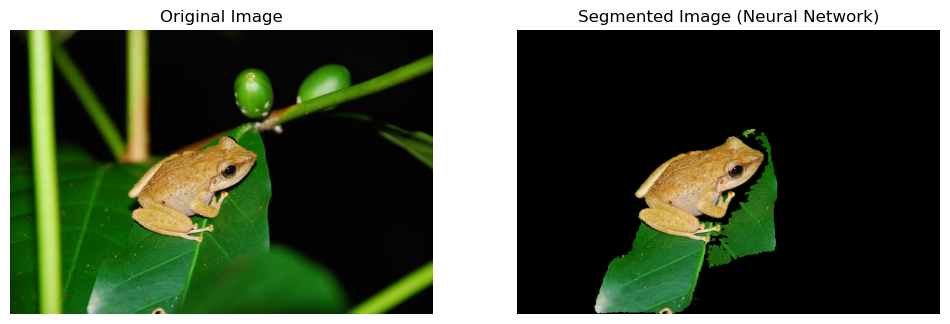

Segmenting image: ./data/horses/horse1.png with offset (0, 0)...


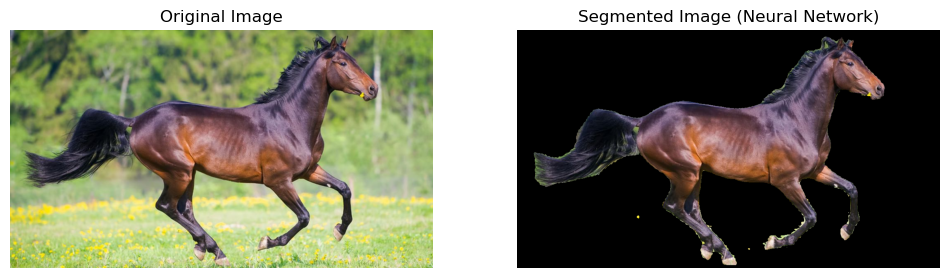

Segmenting image: ./data/horses/horse2.jpg with offset (300, 50)...


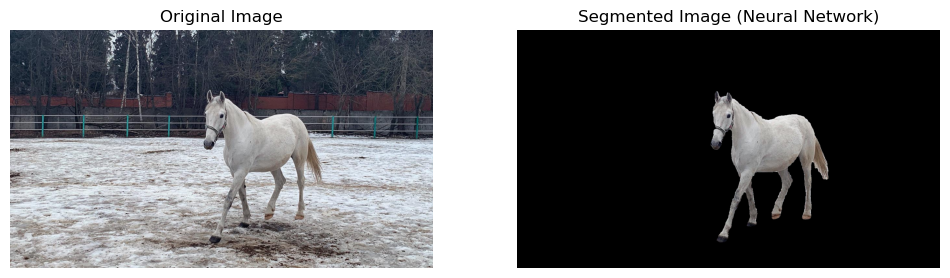

In [88]:
# PART 2b - Neural Network-based Segmentation with Adjustable Offset for Input Point
import torch
from segment_anything import sam_model_registry, SamPredictor
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt


def load_neural_network_model(model_type="vit_b", checkpoint_path="./pretrained/sam_vit_b.pth"):
    """
    Load the neural network segmentation model with the specified type and checkpoint.

    Parameters:
    - model_type (str): The model type (e.g., "vit_b", "vit_l", "vit_h").
    - checkpoint_path (str): Path to the pre-trained model weights.

    Returns:
    - predictor (SamPredictor): The initialized predictor object.
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load the SAM model
    print(f"Loading SAM model '{model_type}' on {device}.")
    sam = sam_model_registry[model_type](checkpoint=checkpoint_path)
    sam.to(device=device)

    # Initialize and return the predictor
    return SamPredictor(sam)


def segment_image_with_offset(predictor, image_path, offset=(0, 0)):
    """
    Perform segmentation on a single image using the predictor with an adjustable input point offset.

    Parameters:
    - predictor (SamPredictor): The initialized predictor object.
    - image_path (str): Path to the image to be segmented.
    - offset (tuple): Offset (dx, dy) from the center of the image.

    Returns:
    - segmented_img (np.ndarray): The segmented image with the applied mask.
    """
    # Load and preprocess the image
    image = np.array(Image.open(image_path))
    predictor.set_image(image)

    # Calculate the input point with the given offset
    h, w, _ = image.shape
    center_x, center_y = w // 2, h // 2
    input_point = np.array([[center_x + offset[0], center_y + offset[1]]])
    input_label = np.array([1])  # Label '1' for the object

    # Perform segmentation prediction
    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )

    # Take the first mask (highest score by default)
    mask = masks[0]

    # Overlay the mask on the original image
    segmented_img = image.copy()  # Copy the original image
    segmented_img[~mask] = 0  # Set background to black

    return image, segmented_img


def visualize_results(original_img, segmented_img, title="Segmented Image (Neural Network)"):
    """
    Display the original and segmented images side by side.

    Parameters:
    - original_img (np.ndarray): The original image.
    - segmented_img (np.ndarray): The segmented image.
    - title (str): Title for the segmented image (optional).

    Returns:
    None
    """
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_img)
    plt.title(title)
    plt.axis("off")

    plt.show()


def run_segmentation_on_images_with_offset(predictor, image_offsets, display=False):
    """
    Run segmentation on multiple images with an adjustable input point offset.

    Parameters:
    - predictor (SamPredictor): The initialized predictor object.
    - image_offsets (list of tuples): List of tuples containing image paths and their respective offsets (dx, dy).

    Returns:
    None
    """
    for path, offset in image_offsets:
        print(f"Segmenting image: {path} with offset {offset}...")
        original_img, segmented_img = segment_image_with_offset(predictor, path, offset)
        if display:
            visualize_results(original_img, segmented_img)


# Example usage:
if __name__ == "__main__":
    # Paths to the images and respective offsets for the input point
    image_offsets = [
        ('./data/frogs/frog1.jpg', (0, 0)),  # Center
        ('./data/frogs/frog2.jpg', (-20, 50)),  # Offset from center
        ('./data/horses/horse1.png', (0, 0)),  # Offset from center
        ('./data/horses/horse2.jpg', (300, 50))  # Offset from center
    ]

    # Load Neural Network Model
    predictor = load_neural_network_model(
        model_type="vit_b",
        checkpoint_path="./pretrained/sam_vit_b_01ec64.pth"
    )

    # Run segmentation on the images with offsets
    run_segmentation_on_images_with_offset(predictor, image_offsets, display=True)

Segmenting image: ./data/my_data/kim.jpeg with offset (0, 0)...


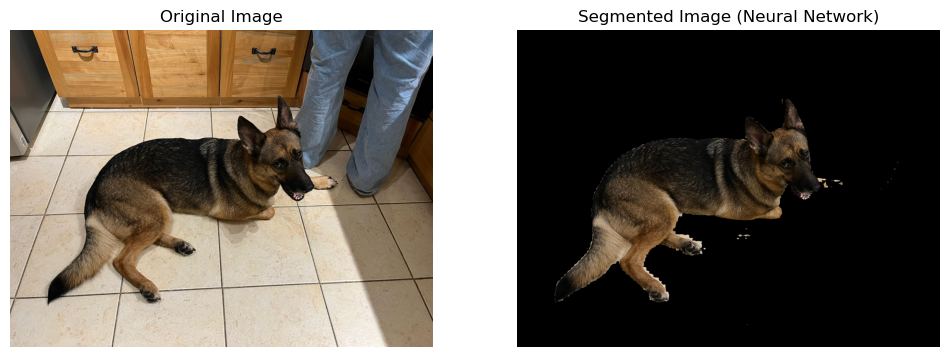

Segmenting image: ./data/my_data/mixer.jpeg with offset (0, 0)...


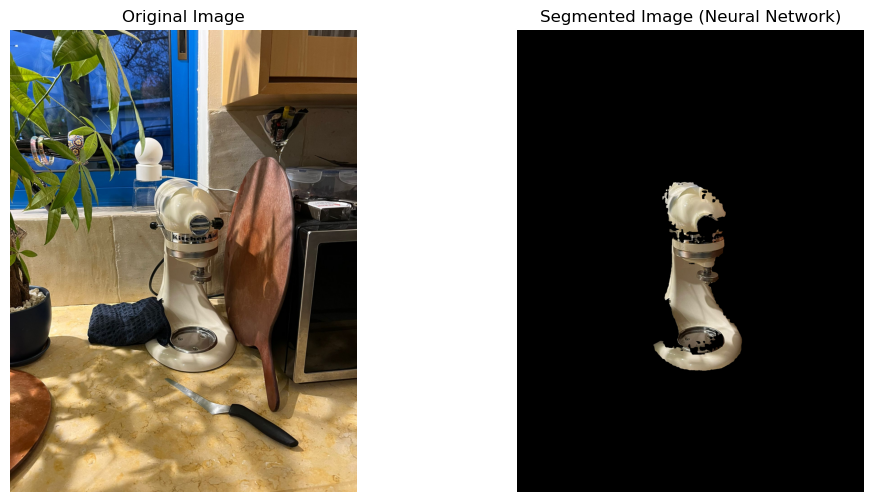

In [78]:
# PART 3

# Paths to the images and respective offsets for the input point
image_offsets = [
    ('./data/my_data/kim.jpeg', (0, 0)),  # Center
    ('./data/my_data/mixer.jpeg', (0, 0)),  # Offset from center
]

# Run segmentation on the images with offsets
run_segmentation_on_images_with_offset(predictor, image_offsets, display=True)


#### Part 2 - Jurrasic Fishbach - bonus
---
In this part you are going to apply segmentation on a video, and integrate with other elements.

<img src="https://lh3.googleusercontent.com/5zF16wl-tdE1FZCuVsrNxHWzfa6uXo4hYE_BGabKnGovw2W-bIT9gnZlAgU8nUoK=w412-h220-rw">

1. Film a short video of yourself (you can use your phone for that), but without too much camera movement. You on the other hand, can move however you want (we expect you to). Convert the video to frames and resize the images for a reasonable not too high resolution (lower than 720p ~ 1280x720 pixles). You can use the function in `./code/frame_video_convert.py` to help you. Display 2 frames in the report.
2. Segment yourself out of the video (frame-by-frame) using one of the methods (classic or deep). Display 2 frames in the report.
3. Pick one of the objects in the supplied videos file (`./data/video_models`), convert it to images and segement it out using one of the methods from Part 1(classic or deep). Display 2 frames in the report. You can choose another object from: https://pixabay.com/videos/search/green%20screen/.
    * Explain how you performed the sementation for this specific type of video (i.e., green-screen videos). Did you  use a simple/classic method? Deep method? Combined both?
4. Put it all together - pick a background, put yourself and the segemented object on the background. Stich it frame-by-frame (don't make the video too long or it will take a lot of time, 10secs maximum). Display 2 frames of the result in your report. Convert the frames back to video. You can use the function in `frame_video_convert.py` to help you.
    * Tip: To make it look good, you can resize the images, create a mapping from pixel locations in the original image to pixels locations in the new image.
    * You should submit the final video in the `./output` folder (**MANDATORY**).
    * We expect some creative results, this can benefit you a lot when you want to demonstrate your Computer Vision abilities.

In [80]:
"""
Author: Tal Daniel
"""
import cv2
import numpy as np
import glob
import os


def image_seq_to_video(imgs_path, output_path='./video.mp4', fps=15.0):
    output = output_path
    img_array = []
    for filename in sorted(glob.glob(os.path.join(imgs_path, '*.jpg'))):
        img = cv2.imread(filename)
        height, width, layers = img.shape
        # img = cv2.resize(img, (width // 2, height // 2))
        img = cv2.resize(img, (width, height))
        height, width, layers = img.shape
        size = (width, height)
        img_array.append(img)

    print(size)
    print("writing video...")
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Be sure to use lower case
    out = cv2.VideoWriter(output, fourcc, fps, size)
    # out = cv2.VideoWriter('project.avi', cv2.VideoWriter_fourcc(*'DIVX'), 15, size)

    for i in range(len(img_array)):
        out.write(img_array[i])
    out.release()
    print("saved video @ ", output)


def video_to_image_seq(vid_path, output_path='./datasets/OTB/img/Custom/'):
    os.makedirs(output_path, exist_ok=True)
    vidcap = cv2.VideoCapture(vid_path)
    success, image = vidcap.read()
    count = 0
    print("converting video to frames...")
    while success:
        fname = str(count).zfill(4)
        cv2.imwrite(os.path.join(output_path, fname + ".jpg"), image)  # save frame as JPEG file
        success, image = vidcap.read()
        # print('Read a new frame: ', success)
        count += 1
    print("total frames: ", count)



In [82]:
# convert video to images
vid_path = './data/video_models/dancing_man_model.mp4'
output_path = './data/my_data/dancing_man_model_image'
video_to_image_seq(vid_path,output_path)


converting video to frames...
total frames:  201


In [90]:
def get_all_image_paths(folder_path):
    """
    Returns the list of all image file paths in a specified folder.

    Parameters:
    - folder_path (str): Path to the folder containing images.

    Returns:
    - list: A list of image file paths.
    """
    return [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Example usage:
image_dir = "./data/my_data/dancing_man_model_image"
all_image_paths = get_all_image_paths(image_dir)

# Create a variable from all_image_paths with paths and offsets
image_offsets = [(path, (0, 0)) for path in all_image_paths]

Segmenting image: ./data/my_data/dancing_man_model_image\0150.jpg with offset (0, 0)...


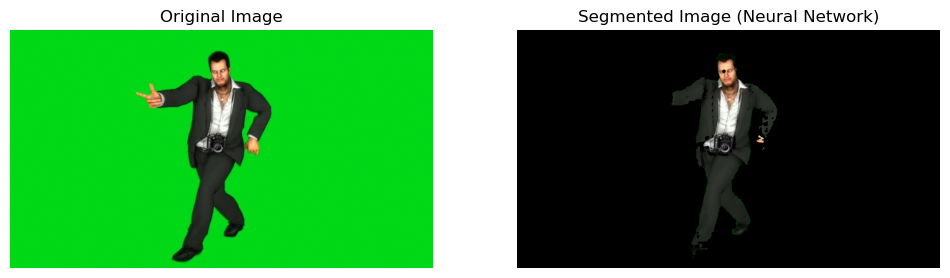

Segmenting image: ./data/my_data/dancing_man_model_image\0151.jpg with offset (0, 0)...


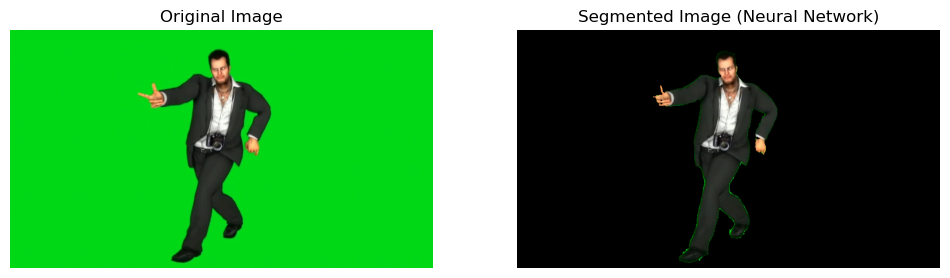

Segmenting image: ./data/my_data/dancing_man_model_image\0152.jpg with offset (0, 0)...


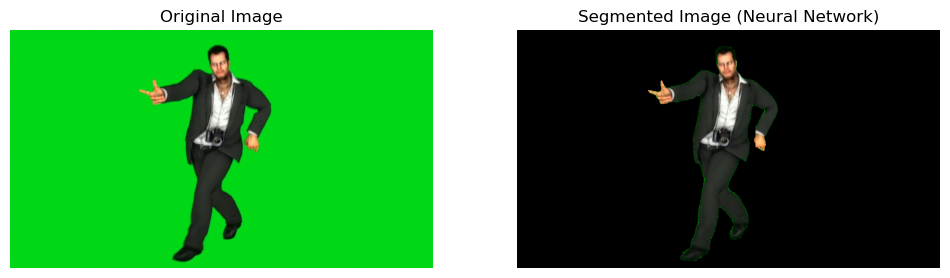

In [94]:

small_batch = image_offsets[150:153]
run_segmentation_on_images_with_offset(predictor, small_batch, display=True)



#### Part 3 - Planar Homographies - mandatory :
---
After we saw how descriptors are implemented and performed, now we will see how to use them for homographis.

In this part you will implement an image stitching algorithm, and will learn how to stitch several images of the same scene into a panorama. First, we’ll concentrate on the case of two images and then extend to several images.

For the following tasks:
- **You are not allowed to use OpenCV/Scipy or any other "ready to use" functions when you are asked to implement a function (you can still use the functions to save and load images).**
- For each step add illustration images to your report.
- You can demonstrate your steps using `incline_L.jpg` and `incline_R.jpg` images, or any other relevant example images (unless specified otherwise).

#### Planar Homographies: Theory review
---
Suppose we have two cameras $C_1$ and $C_2$ looking at a common plane $Π$ in 3D space. Any 3D point $P$ on $Π$ generates a projected 2D point located at $p ≡ (x,y,1)^T$ on the ﬁrst camera $C_1$ and $q ≡ (u,v,1)^T$ on the second camera $C_2$. Since $P$ is conﬁned to the plane $Π$, we expect that there is a relationship between $p$ and $q$. In particular, there exists a common $3 × 3$ matrix $H$, so that for any $P$, the following conditions holds: 
\begin{align}
\text{(1) }q ≡ Hp
\end{align}



We call this relationship *'planar homography'*. Recall that both $p$ and $q$ are in homogeneous coordinates and the equality $≡$ means $p$ is proportional to $Hq$ (recall homogeneous coordinates). It turns out this relationship is also true for cameras that are related by pure rotation without the planar constraint. 

##### **Matched points:**
---

Given a set of points $p = \{p_1,p_2,...,p_N\}$ in an image taken by camera $C_1$ and corresponding points $q = \{q_1,q_2,...,q_N\}$ in an image taken by $C_2$. Suppose we know there exists an unknown homography $H$ between corresponding points for all $i ∈\{1,2,...,N\}$. This formally means that $\exists H$ such that: 

 
\begin{equation*} 
\text{(2) } q^i ≡ Hp^i
\end{equation*}


where $p^i = (x_i,y_i,1)$ and $q^i = (u_i,v_i,1)$ are homogeneous coordinates of image points each from an image taken with $C_1$ and $C_2$ respectively.

* Given $N$ correspondences in $p$ and $q$ and using Equation 2, we derived a set of $2N$ independent linear equations in the form:


\begin{equation*} 
\text{(3) } Ah = 0
\end{equation*}


where $h$ is a vector of the elements of $H$ and $A$ is a matrix composed of elements derived from the point coordinates:  

$$ \begin{bmatrix} &&&&&\dots\\ x_i & y_i & 1 & 0 & 0 & 0 & -x_iu_i&-y_iu_i& -u_i \\ 0&0&0&x_i&y_i&1 & -x_iv_i&-y_iv_i& -v_i \\ &&&&&\dots \end{bmatrix} 
\begin{bmatrix} h_1\\h_2\\h_3\\ h_4 \\ h_5 \\ h_6 \\ h_7\\h_8\\h_9\\ \end{bmatrix} = \begin{bmatrix} \dots \\ 0 \\ 0  \\ \dots \end{bmatrix}$$


Each point pair contributes 2 equations and therefore we need at least 4 matches.

#### Planar Homographies: Practice 
---

#### Quick detour- Feature Descriptor
---
In this part we are going to use **Scale-Invariant Feature Transform** (SIFT). We will use OpenCV <a href="https://docs.opencv.org/3.4/db/d27/tutorial_py_table_of_contents_feature2d.html">[2]</a> for the implementation.

##### 3.0.1 SIFT Implementaion
---
Implement the following function:


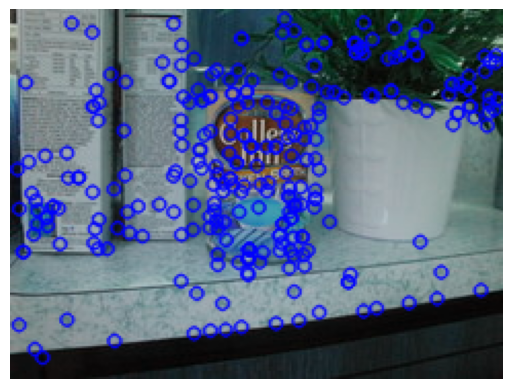

In [4]:
import cv2
import matplotlib.pyplot as plt

def SIFT_descriptor(img, display=False):
    # Returns the SIFT descriptor keypoints of an image,and draw its detected keypoints
    # INPUTS
    #      img                 - An image read by cv2.imread()
    # OUTPUTS
    #      sift_descriptor     - The SIFT descrptor computed by OpenCV
    #      sift_keypoints      - The SIFT keypoints computed by OpenCV
    # Initialize the SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()

    # Detect SIFT keypoints and descriptors
    sift_keypoints, sift_descriptor = sift.detectAndCompute(img, None)

    output_image = cv2.drawKeypoints(img, sift_keypoints, 0,
                                     (0, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
    if display:
        plt.imshow(output_image)
        plt.axis("off")
        plt.show()


    return sift_keypoints, sift_descriptor


# img_path = './data/chickenbroth/model_chickenbroth.jpg'
img_path = './data/chickenbroth/chickenbroth_05.jpg'
img = cv2.imread(img_path)
sift_keypoints, sift_descriptor = SIFT_descriptor(img, display=True)



The function get an image ,returns its SIFT descriptor and keypoints, and draw the detected keypoints over the image.

Plot the results obtained for the `model_chickenbroth` image and another `chickenbroth` image (Use the same image from previous section).


* Implementaton guidance:
    * Use `sift = cv2.xfeatures2d.SIFT_create()` to instantiate the SIFT detector. 
    * Detect and compute SIFT keypoints and descriptors by `sift_keypoint, sift_descriptor = sift.detectAndCompute(img,None)`.
    * Draw the keypoints over the image by using `cv2.drawKeypoints()`.


##### 3.1 - Finding corresponding points using SIFT: 
---
Use the guidelines from 3.0.1 and implement the function `getPoints_SIFT()`, which gets two images and outputs `p1,p2` SIFT keypoints, where `p1[j],p2[j]` are pairs of cooresponding points between `im1` and `im2`.

In [5]:
import cv2
import numpy as np


def getPoints_SIFT(im1, im2):
    """
    Finds pairs of corresponding points (keypoints) between two images using SIFT.

    Parameters:
    - im1: First image, read using cv2.imread().
    - im2: Second image, read using cv2.imread().

    Returns:
    - p1: Array of corresponding keypoints in the first image.
    - p2: Array of corresponding keypoints in the second image.
    """
    # Compute SIFT descriptors for both images
    sift_keypoints1, sift_descriptor1 = SIFT_descriptor(im1)
    sift_keypoints2, sift_descriptor2 = SIFT_descriptor(im2)

    # Use a brute-force matcher to find the best matches between descriptors
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(sift_descriptor1, sift_descriptor2, k=2)  # Find the two closest matches for each descriptor

    # Apply ratio test to keep only good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:  # Lowe's ratio test
            good_matches.append(m)

    # Extract the corresponding points from the good matches
    p1 = np.array([sift_keypoints1[m.queryIdx].pt for m in good_matches])
    p2 = np.array([sift_keypoints2[m.trainIdx].pt for m in good_matches])

    return p1, p2


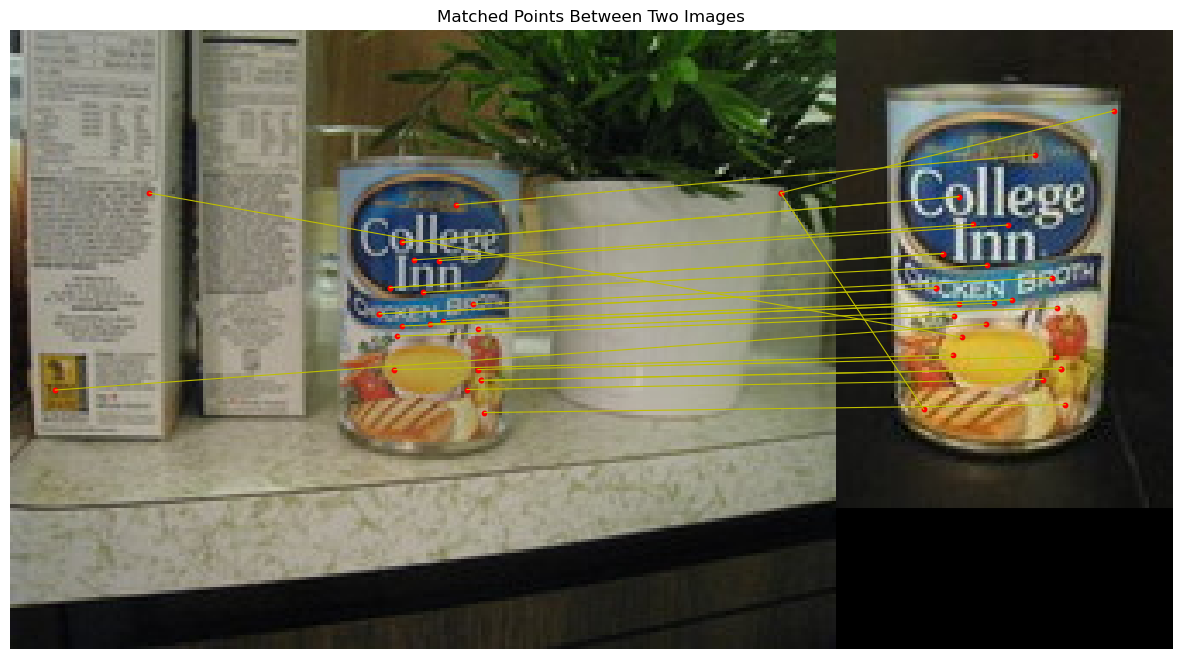

In [6]:
import cv2
import matplotlib.pyplot as plt

def plot_matched_points(im1, im2, p1, p2):
    """
    Plots the matched points between two images.

    Parameters:
    - im1: First image, read using cv2.imread().
    - im2: Second image, read using cv2.imread().
    - p1: Array of corresponding points in the first image.
    - p2: Array of corresponding points in the second image.
    """
    # Convert images to RGB for display
    im1_rgb = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
    im2_rgb = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

    # Create a canvas to plot both images side by side
    h1, w1, _ = im1.shape
    h2, w2, _ = im2.shape
    canvas_height = max(h1, h2)
    canvas_width = w1 + w2
    canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)
    canvas[:h1, :w1, :] = im1_rgb
    canvas[:h2, w1:, :] = im2_rgb

    # Plotting the matches
    plt.figure(figsize=(15, 10))
    plt.imshow(canvas)

    # Adjust offset for the second image
    offset = w1

    # Draw matches with lines connecting corresponding points
    for pt1, pt2 in zip(p1, p2):
        x1, y1 = pt1
        x2, y2 = pt2
        x2 += offset  # Adjust x-coordinate for the second image
        plt.plot([x1, x2], [y1, y2], 'y-', linewidth=0.8)
        plt.scatter([x1, x2], [y1, y2], color='r', s=10)

    plt.axis('off')
    plt.title("Matched Points Between Two Images")
    plt.show()

# Example usage:
img1 = cv2.imread('./data/chickenbroth/chickenbroth_05.jpg')
img2 = cv2.imread('./data/chickenbroth/model_chickenbroth.jpg')
p1, p2 = getPoints_SIFT(img1, img2)
plot_matched_points(img1, img2, p1, p2)

Inputs: `im1` and `im2` are two 2D grayscale images. 

Output: `p1` and `p2` should be $2\times N$ matrices of corresponding $(x,y)^T$ coordinates between two images ($N$ is the number of corrosponding points you want to extract.). 

* You can also use color images instead of grayscale images, just state it in the report.

#### 3.2 - Calculate transformation: 
---

Implement a function that gets a set of matching points between two images and calculates the transformation between them. The transformation should be $3\times3$ $H$ homogenous matrix such that for each point in image $p\in C_1$, there would be a transformation in image $C_2$ such that $p=Hq$, $q\in C_2$.

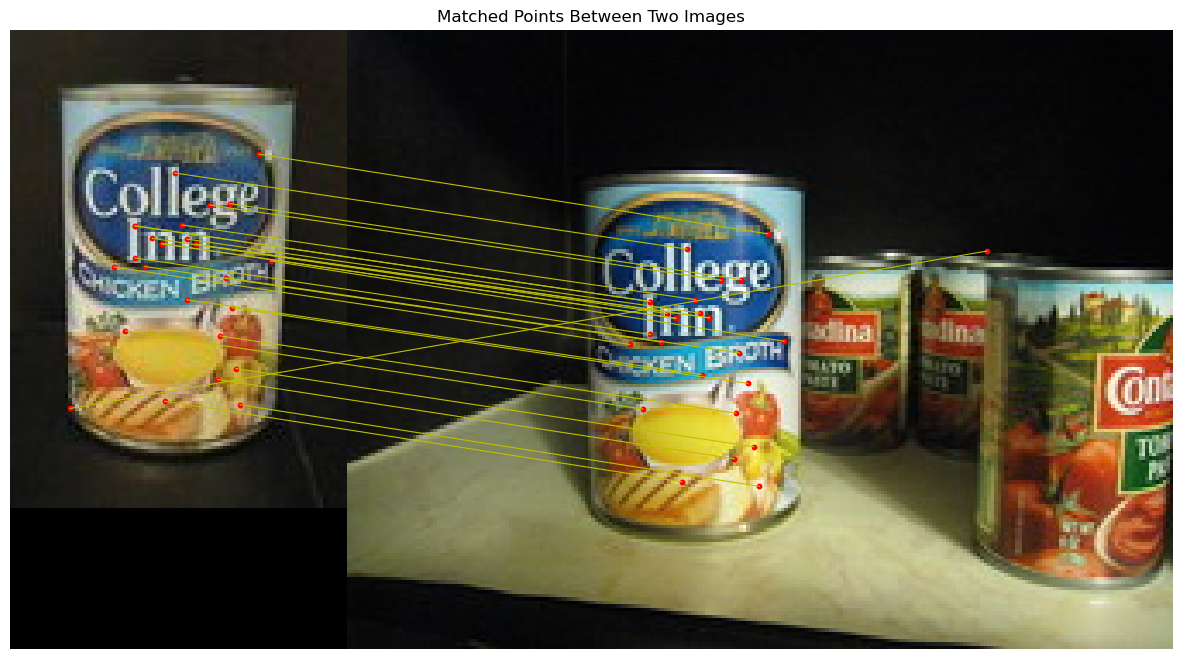

H Matrix:
[[-1.83230925e-01 -1.86691869e-01  4.14843336e+01]
 [-4.75901154e-01 -1.60335822e-01  7.10625060e+01]
 [-5.71254743e-03 -3.12259146e-03  1.00000000e+00]]


In [7]:
def buildingA(dst_points,src_points):

    num_points = len(src_points)
    A = np.zeros((2 * num_points, 9))

    for i in range(num_points):
        x, y = src_points[i]
        x_prime, y_prime = dst_points[i]

        A[2*i] = [x, y, 1, 0, 0, 0, -x_prime*x, -x_prime*y, -x_prime]
        A[2*i + 1] = [0, 0, 0, x, y, 1, -y_prime*x, -y_prime*y, -y_prime]

    return A

def computeH(dst_points,src_points):

    A = buildingA(dst_points,src_points)
    u, s, vh = np.linalg.svd(A)
    H2to1 = vh[8].reshape(3, 3)
    H2to1 = H2to1 / H2to1[2, 2]

    return H2to1

# Example usage:
img1 = cv2.imread('./data/chickenbroth/model_chickenbroth.jpg')
img2 = cv2.imread('./data/chickenbroth/chickenbroth_01.jpg')
p1, p2 = getPoints_SIFT(img1, img2)
plot_matched_points(img1, img2, p1, p2)

H = computeH(p1,p2)
print("H Matrix:")
print(H)

Inputs: `p1` and `p2` should be $2\times N$ matrices of corresponding $(x,y)^T$ coordinates between two images. 

Outputs: `H2to1` should be a $3\times 3$ matrix encoding the homography that best matches the linear equation derived above for Equation 2. 

Hint: Remember that a homography is only determined up to scale. The `numpy`'s functions `eig()` or `svd()` will be useful. Note that this function can be written without an explicit for-loop over the data points.

*Hint for debugging*: A good test of your code is to check that the homography of an image with itself is an identity.

* Implement the computation function, describe and explain your implementation.
* Show that the transformation is correct by selecting arbitrary points in the first image and projecting them to the second image.

#### 3.3 - Image warping:
---
Implement a function that gets an input image and a transformation matrix H and returns the warped image. Please note that after the warping, there will be coordinates that won’t be integers (e.g. sub-pixels). Therefore you will need to interpolate between neighboring pixels. For color images, warp the image for each color channel and then connect them together. In order to avoid holes, use inverse warping.

Implement the wrapping function using numpy and SciPy interp2d() or RegularGridInterpolator() function .
Discuss the influences of different interpolations kinds {‘linear’, ‘cubic’}.
Note: When performing a multi-step algorithm, you need to demonstrate and explain each of those additional improvments.


In [8]:
from scipy.interpolate import RegularGridInterpolator

def warpH(image, H, out_size):
    width, height = out_size

    # Create coordinate grids for the output image
    y, x = np.mgrid[0:height, 0:width]

    # Create homogeneous coordinates
    coords = np.stack((x.ravel(), y.ravel(), np.ones_like(x.ravel())))

    # Apply inverse transformation
    H_inv = np.linalg.inv(H)
    warped_coords = H_inv.dot(coords)

    # Normalize coordinates
    warped_coords /= warped_coords[2]

    # Reshape coordinates
    warped_x = warped_coords[0].reshape(height, width)
    warped_y = warped_coords[1].reshape(height, width)

    # Create interpolation functions for each channel
    warped_image = np.zeros_like(image)
    for channel in range(image.shape[2]):
        interp = RegularGridInterpolator((np.arange(height), np.arange(width)),
                                         image[:,:,channel],
                                         method='linear',
                                         bounds_error=False,
                                         fill_value=0)

        # Interpolate values
        warped_image[:,:,channel] = interp((warped_y, warped_x))

    return warped_image



Inputs: `im1` is a colored image. `H` is a  matrix encoding the homography between im1 and im2. `out_size` is the size of the wanted output (new_imH,new_imW).

Output: `warp_im1` is the warped image im1 including empty background (zeros).

##### 3.4 - Panorama stitching: 
---
Implement a function that gets two images after axis alignment (using OpenCV's `warpPerspective`)
and returns a union of the two. The union should be a simple overlay of one image on the other. Leave empty pixels painted black.


In [13]:
import cv2

def imageStitching(img1, warp_img2):

    # Ensure both images have the same dimensions
    if img1.shape != warp_img2.shape:
        raise ValueError("Both images must have the same dimensions")

    # Create a black canvas with the same dimensions as the input images
    height, width = warp_img2.shape[:2]
    panoImg = np.zeros((height, width, 3))

    # Create masks for non-black pixels in each image
    mask1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) > 0
    mask2 = cv2.cvtColor(warp_img2, cv2.COLOR_BGR2GRAY) > 0

    # Copy non-black pixels from image1 to the union
    panoImg[mask1] = img1[mask1]

    # Overlay non-black pixels from image2 on top of the union
    panoImg[mask2] = warp_img2[mask2]

    return panoImg


# im1_path = './data/incline_L.png'
# im2_path = './data/incline_R.png'
# img1 = cv2.imread(im1_path)
# img2 = cv2.imread(im2_path)
#
# p1, p2 = getPoints_SIFT(img1, img2)
# plot_matched_points(img1, img2, p1, p2)
# H = computeH(p1,p2)

# height2, width2, channels = img2.shape
# height1, width1, channels = img1.shape
#
# wrap_img2 = warpH(img2,H,(width2, height2))
# plt.imshow(wrap_img2)
#
# aligned_image2 = cv2.warpPerspective(img2, H, (width1, height1))
#
# out = cv2.warpPerspective(img,H,(width1, height1),flags=cv2.INTER_LINEAR)
# panoImg = imageStitching(img1, aligned_image2)
# plt.imshow(panoImg)

warp_img2 = cv2.warpPerspective(img2, H,(1700,650),
                                cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT)
# Create panorama using the imageStitching function
incline_panorama = imageStitching(img1, warp_img2).astype(int)
fig, ax = plt.subplots(figsize =(10,10))
ax.imshow(incline_panorama)
ax.axis('off')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 576 but corresponding boolean dimension is 650

Inputs: `im1`,`warp_img2` are two colored images. 

Output: `panoImg` is the gathered output  panorama.

* Use all the above functions to create a panorama image. Demonstrate and explain you results on the `./data/incline` images.

##### 3.5 - Several Images stitching:
---
* Show the results of the panoramas on the attached images of the beach (`./data/beach`) and Pena National Sintra Palace (`./data/sintra`) for the entire set of images.

* Note: When using SIFT without RANSAC (next section), take the top K matches for estimating the homography. 
  * What happens if you don't do so? Why is that?

##### 3.6 - RANSAC:
---
Added bellow is an implementation of the RANSAC (**Ran**dom **Sa**mple **C**onsensus) algorithm. 
* Explain when it is needed and why.
* Copmare between using RANSAC vs. not using it for creating the panoran images of the beach and SINTRA. Explain.
* What could have been done to get better results?

In [ ]:
def ransacH(p1, p2, nIter=..., tol=...):
    N = p1.shape[1]
    stacked_p2 = np.vstack((p2, np.ones(N)))

    best_inliers_n = 0
    best_inliers = []

    for iter in range(nIter):
        rand_idxs = np.random.choice(np.arange(N), 4, replace=False)
        chosen_p1 = p1[:, rand_idxs]
        chosen_p2 = p2[:, rand_idxs]
        H2to1 = computeH(chosen_p1, chosen_p2)
        p2in1 = H2to1 @ stacked_p2
        p2in1 = p2in1 / p2in1[2, :]
        p2in1 = p2in1[0:2, :]
        L2dists = np.sqrt(np.sum((p2in1 - p1) ** 2, 0))
        inliers = (p1[:, L2dists < tol], p2[:, L2dists < tol])
        n_inliers = np.sum(L2dists < tol)
        if n_inliers > best_inliers_n:
            best_inliers_n = n_inliers
            best_inliers = inliers

    bestH = computeH(best_inliers[0], best_inliers[1])
    return bestH

Inputs: 
* `p1` and `p2` are matrices specifying point locations in each of the images and `p1[j]`,`p2[j]` are matched points between two images.

* `nIter` is the number of iterations to run RANSAC  

* `tol` is the tolerance value for considering a point to be an inlier. 

 * Define your function so that these  `nIter` and  `tol` have reasonable default values.

Outputs: 
* `bestH` is the homography model with the most inliers found during RANSAC

##### 3.7 - Be Creative:
---
* Go out and take at least 3 pictures of a far distance object (e.g. a building), and use what you have learned to create a new excellent Panorama image.
  * Add the resulted image to your report and to the `output` folder.

---
## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Images from <a href="http://www.image-net.org/">Imagenet</a>
* Videos from <a href="https://pixabay.com/videos/search/green%20screen/">Pixabay</a>
    * Dinosaur video from <a href="https://sites.google.com/a/sau17.net/modern-media/home/green-screen-animations">Modern Media</a>
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com